In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.metrics import accuracy_score;
from sklearn.model_selection import cross_val_score;
from collections import Counter;
from sklearn import model_selection;

In [3]:
names = ['x', 'y', 'class']

df = pd.read_csv('./demo_data/1.ushape.csv', header=None, names=names);
print(df.head(3));

X = np.array(df.iloc[:, :2]);
print(X[:2]);
y = np.array(df['class']);
print(y[:2])

          x         y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]]
[0. 1.]


In [4]:
X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1);

X_train, X_cv, y_train, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3, random_state=1)
print('percentage of training data available as compare to total data', len(X_train)/len(X)*100);

for i in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = i);
    knn.fit(X_train, y_train);
    
    predict = knn.predict(X_cv);
    
    acc = accuracy_score(y_cv, predict, normalize=True)*100;
    
    print('Accuracy for k={}, is {}%'.format(i,acc));

#since we are getting highest accuracy for k=3, 5, 7 therefore we choose k=5
knn = KNeighborsClassifier(n_neighbors=5);
knn.fit(X_train, y_train);
predict = knn.predict(X_test);
acc = accuracy_score(y_test, predict, normalize=True)*100
print('Accuracy for test data: {}%'.format(acc))

percentage of training data available as compare to total data 49.0
Accuracy for k=1, is 90.47619047619048%
Accuracy for k=3, is 95.23809523809523%
Accuracy for k=5, is 95.23809523809523%
Accuracy for k=7, is 95.23809523809523%
Accuracy for k=9, is 85.71428571428571%
Accuracy for k=11, is 85.71428571428571%
Accuracy for k=13, is 80.95238095238095%
Accuracy for k=15, is 80.95238095238095%
Accuracy for k=17, is 85.71428571428571%
Accuracy for k=19, is 85.71428571428571%
Accuracy for k=21, is 80.95238095238095%
Accuracy for k=23, is 85.71428571428571%
Accuracy for k=25, is 85.71428571428571%
Accuracy for k=27, is 80.95238095238095%
Accuracy for k=29, is 80.95238095238095%
Accuracy for test data: 90.0%


percentage of accuracy for k=1, is [91.66666667 91.30434783 95.65217391]
percentage of accuracy for k=3, is [ 91.66666667  95.65217391 100.        ]
percentage of accuracy for k=5, is [ 83.33333333  95.65217391 100.        ]
percentage of accuracy for k=7, is [ 83.33333333  95.65217391 100.        ]
percentage of accuracy for k=9, is [ 83.33333333  95.65217391 100.        ]
percentage of accuracy for k=11, is [ 83.33333333  86.95652174 100.        ]
percentage of accuracy for k=13, is [87.5        86.95652174 95.65217391]
percentage of accuracy for k=15, is [83.33333333 86.95652174 95.65217391]
percentage of accuracy for k=17, is [83.33333333 86.95652174 95.65217391]
percentage of accuracy for k=19, is [83.33333333 78.26086957 95.65217391]
0.04227053140096615
optimal number of neighbors:  3


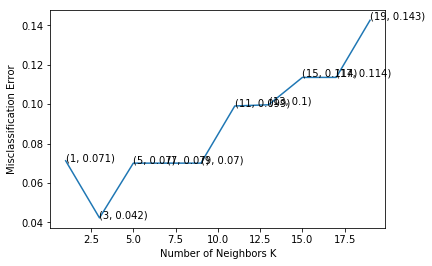

the misclassification error for each k value is :  [0.071 0.042 0.07  0.07  0.07  0.099 0.1   0.114 0.114 0.143]


In [7]:
k_list = list(range(1, 20));
neighbors = list(filter(lambda x: x%2 != 0, k_list));
cv_scores = [];

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k);
    scores = cross_val_score(knn, X_1, y_1, cv=3, scoring='accuracy');
    cv_scores.append(scores.mean());
    print('percentage of accuracy for k={}, is {}'.format(k, scores*100));

#Misclassification error
MSE = [1 - x for x in cv_scores];
# print(MSE)
print(min(MSE))

optimal_neighbor = neighbors[MSE.index(min(MSE))];
print('optimal number of neighbors: ', optimal_neighbor)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [10]:
#KNN with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_neighbor);
knn.fit(X_1, y_1);
pred = knn.predict(X_test);

accuracy_test = accuracy_score(y_test, pred, normalize=True);
print('accurcay for test data is: ', accuracy_test*100)

accurcay for test data is:  93.33333333333333
